
## Supervised learning - nearest algorithm classifier
    


In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns

# DATA Import

In [12]:
data = pd.read_csv('wine.csv') 
data.head() #check the clean data frame

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1) Data preprocessing

In [10]:
print('\033[1m'+'Number of unique wine types: ' + '\033[0m',data['Wine'].nunique())

print("\n\n",'\033[1m'+ 'Data analysis:' + '\033[0m',"\n")
print(data.info())

print("\n\n", '\033[1m'+ 'Look for undefined:' + '\033[0m' ,"\n",data.isnull().sum())

Number of unique wine types:  3


 Data analysis: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(

<font color = red> 
    ***OBSERVATII***
    <br><br> After checking the data set, we can see that there are no invalid enteries that need to be dealt with. We can leave the data set as is for our futher project. This is quite a large advantage of our chosen data set since it's already clean, however this is not normally the case. Usually when we get a raw data set we need to clean it up before we use any kind of classification algorithms: check and deal with outliers, faulty enteries, duplicates, etc.

# 2. Classification 

We want to predict the wine type using Color intensity, Hue, Malic acid, and Ash. We also try to find an estimation for the classification accuracy (number of correctly classified wines to the total number of wines) using random training and test sets.

#### <font color = dimgrey> The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, we perform Z-score standardization.

In [18]:
data_copy = data.copy(deep=True)
data_copy[['Color.int', 'Malic.acid', 'Hue', 'Ash']] = StandardScaler().fit_transform(data_copy[['Color.int', 'Malic.acid', 'Hue', 'Ash']])
data_copy.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,-0.562250,0.232053,15.6,127,2.80,3.06,0.28,2.29,0.251717,0.362177,3.92,1065
1,1,13.20,-0.499413,-0.827996,11.2,100,2.65,2.76,0.26,1.28,-0.293321,0.406051,3.40,1050
2,1,13.16,0.021231,1.109334,18.6,101,2.80,3.24,0.30,2.81,0.269020,0.318304,3.17,1185
3,1,14.37,-0.346811,0.487926,16.8,113,3.85,3.49,0.24,2.18,1.186068,-0.427544,3.45,1480
4,1,13.24,0.227694,1.840403,21.0,118,2.80,2.69,0.39,1.82,-0.319276,0.362177,2.93,735


#### <font color = lightcoral>Produce training and test data
-Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the wine type as array y (output variable)
    
-Divide the data randomly into training (80%) and test (20%) sets

<IPython.core.display.Javascript object>


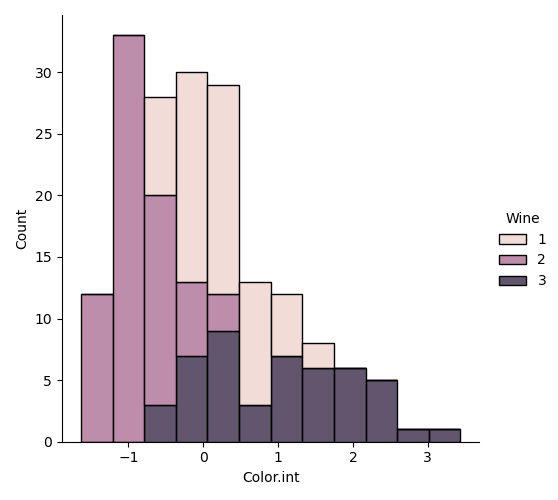

<IPython.core.display.Javascript object>


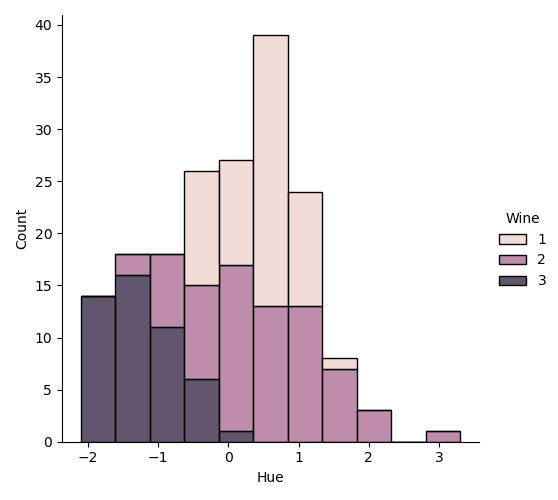

<IPython.core.display.Javascript object>


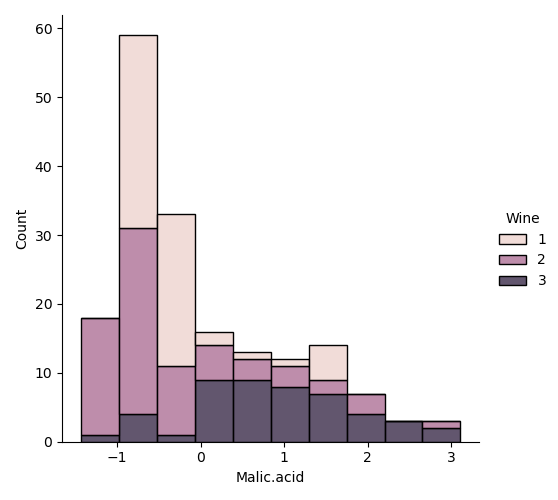

<IPython.core.display.Javascript object>


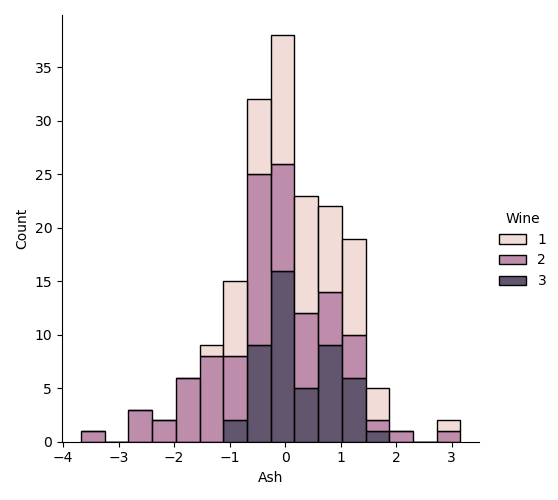

In [62]:

X = data_copy[['Color.int', 'Hue', 'Malic.acid','Ash']].values
y = data_copy[['Wine']].values

#plot to visualise the data
sns.displot(data_copy, x="Color.int", hue="Wine", multiple="stack")
sns.displot(data_copy, x="Hue", hue="Wine", multiple="stack")
sns.displot(data_copy, x="Malic.acid", hue="Wine", multiple="stack")
sns.displot(data_copy, x="Ash", hue="Wine", multiple="stack")

plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8, stratify=y)



<font color = red> 
    ***OBSERVATII***
    <br><br> After plotting, we can observe the fact that many values overlap and may be confused with one another, not to mention the fact that the attribute "3" has very few values which are almost completely overlapped with the values from "1" and "2". Thus, in order to make sure that we are taking into consideration every attribute equally, it is a good idea to use stratification. <br><br>

#### <font color = lightcoral> Training the model and testing its performance 
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- What is the (total) classification accuracy?

In [63]:
def accuracy (predicted, test):
    acc=0
    cnt=0
    for i in range(len(test)):
        if (predicted[i] == test[i]):
            cnt = cnt + 1
        acc=100*cnt/len(test)
    return(acc)

In [64]:
### Code for NN
clasf = KNeighborsClassifier(n_neighbors=1)
y_prediction=clasf.fit(X_train, y_train.ravel()).predict(X_test)
print("Cofusion matrix : \n", metrics.confusion_matrix(y_test, y_prediction))


Cofusion matrix : 
 [[12  0  0]
 [ 1 12  1]
 [ 1  0  9]]


In [65]:
print("(Total) Classification accuracy:  ",accuracy(y_prediction,y_test)," %")

(Total) Classification accuracy:   91.66666666666667  %


In [68]:
### Code for 3-NN
clasf3 = KNeighborsClassifier(n_neighbors=3)
y_prediction3=clasf3.fit(X_train, y_train.ravel()).predict(X_test)
print("Cofusion matrix : \n", metrics.confusion_matrix(y_test, y_prediction3))

Cofusion matrix : 
 [[12  0  0]
 [ 3 11  0]
 [ 0  0 10]]


In [69]:
print("(Total) Classification accuracy:  ",accuracy(y_prediction3,y_test)," %")

(Total) Classification accuracy:   91.66666666666667  %


In [70]:
### Code for k-NN
###Choose k=100
clasfk = KNeighborsClassifier(n_neighbors=100)
y_predictionk=clasfk.fit(X_train, y_train.ravel()).predict(X_test)
print("Cofusion matrix : \n", metrics.confusion_matrix(y_test, y_predictionk))

Cofusion matrix : 
 [[12  0  0]
 [ 5  9  0]
 [10  0  0]]


In [71]:
print("(Total) Classification accuracy:  ",accuracy(y_predictionk,y_test)," %")

(Total) Classification accuracy:   58.333333333333336  %


<font color = red> 
    ***OBSERVATII***
    <br><br> The code we have used takes at random different samples of the three wine types to use as train or test groups. After running the code multiple times, I noticed that both the confusion matrix and the total classification accuracy change, however, the accuracy value revolves around 80-90% for the first two cases and around 50% for the k-nn classifier. These differences appear beacause we take a number of different random samples to use in our groups each time from all the three attributes ("1", "2", "3"), so of course we will have some good predictions sometimes and some wrong predictions in other instances, but the important is the fact that the genaral Total Classification accuracy is high each time. We can see, that as the number of k-nearest neighbours increases, our accuracy gets smaller exponentially, because we are trying to form clusters with more neighbours in a rather small data set (we have used 100 neighbours in a data set with 178 enteries)<br><br>

# 3. Classification accuracy using leave-one-out cross validation

In [28]:
def acc_loo(dom, k):
    A=0
    n=0
    for train_index, test_index in LeaveOneOut().split(dom):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train.ravel()).predict(X_test)#could be done in one line
        c=0
        for i in range(len(y_test)):
            if (predicted[i] == y_test[i]):
                c = c + 1
            A= A+c
            n=n+1
    acc_loo=100*A/n
    return(acc_loo)


In [29]:
def accur(m,n):
    acc=100*m/n
    return(acc)
#Python wasn't reading sklearn.metrics,accuracy_score. Made my own

In [30]:
### Code for NN

print("Total classification accuracy (leave-one-out): ",acc_loo(X,1)," %") 

Total classification accuracy (leave-one-out):  84.26966292134831  %


In [31]:
### Code for 3-NN

print("Total classification accuracy (leave-one-out): ",acc_loo(X,3)," %") 

Total classification accuracy (leave-one-out):  83.70786516853933  %


In [72]:
### Code for k-NN
### k=100

print("Total classification accuracy (leave-one-out): ",acc_loo(X,100)," %") 

Total classification accuracy (leave-one-out):  74.71910112359551  %


<font color = red> 
    ***OBSERVATII***

<br><br>The Leave-One-Out method gives the best evaluation of the performance of the classifier. This is due to the fact that the result stays constant, while for the simple classifier we have a different result at each run of the program, so we can't be sure which is the correct value. For the Leave-One-Out algorithm we have an accuracy of around 70-80% no matter the k we use, which is good enough. Compared to the result of the previous point, this accuracy may not always be the best, but it certainly is the most steady, considering that the result stays the same at each run of the programme, while the other doesn't.


# 4. Model selection with leave-one-out cross validation

- We try to select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...100).


In [33]:
# Code for k-NN
#choose k from 1 to 30
array = [None]*100

for k in range(1,101):

    array[k-1] = acc_loo(X,k)
    print("Accuracy for k=",k," is ",acc_loo(X,k)," %")

Accuracy for k= 1  is  84.26966292134831  %
Accuracy for k= 2  is  80.89887640449439  %
Accuracy for k= 3  is  83.70786516853933  %
Accuracy for k= 4  is  85.3932584269663  %
Accuracy for k= 5  is  87.64044943820225  %
Accuracy for k= 6  is  82.58426966292134  %
Accuracy for k= 7  is  83.70786516853933  %
Accuracy for k= 8  is  84.8314606741573  %
Accuracy for k= 9  is  85.3932584269663  %
Accuracy for k= 10  is  84.26966292134831  %
Accuracy for k= 11  is  83.70786516853933  %
Accuracy for k= 12  is  84.26966292134831  %
Accuracy for k= 13  is  82.58426966292134  %
Accuracy for k= 14  is  84.8314606741573  %
Accuracy for k= 15  is  84.26966292134831  %
Accuracy for k= 16  is  82.02247191011236  %
Accuracy for k= 17  is  83.70786516853933  %
Accuracy for k= 18  is  82.58426966292134  %
Accuracy for k= 19  is  83.70786516853933  %
Accuracy for k= 20  is  82.02247191011236  %
Accuracy for k= 21  is  83.14606741573034  %
Accuracy for k= 22  is  83.70786516853933  %
Accuracy for k= 23  is 

<font color = red> 
    ***OBSERVATII***
    <br><br> The smaller values of k (k=1, k=2, k=3, etc) produce the best classification accuracy. This is due to the fact that a small k leads to overfitting which in turn leads to a small generalization of the data. As k increases, we see that the classification accuracy reaches a limit of around 70% and doesn't go any lower than that. This happens because we are taking more data into account, thus making the model less flexible.<br><br>
    Normally, the LOOCV algorithm is quite taxing when it comes to the resources of the system, especially if we have a large data set. However, as long as we mentain the number of enteries within reasonable parameters, the model should perform quite well, given the fact that we need to choose an apropriate k for the algorithm. Since we don't want neither an overfitting nor an underfitting model, the value of k should be around the middle of the given interval (1 to 100) since we can see that the accuracy scores tend to get a bit more stable around there ( the differences between them aren't that great).
Further research actually shows that the value k=10 is quite common for this algorithm because, given extensive testing, 10-fold cross-validation provides a good balance of low computational cost and low bias in the estimate of model performance as compared to other k values and a single train-test split.(source: https://tinyurl.com/ycdffmbt).

________________
### <font color = red>  5. Testing with training data <font color = red> (just to see what are the results!) </font>

- We repeat the previous task but use the whole data for training


In [73]:

field = [None]*100

for k in range(1,101):
    y_prediction = KNeighborsClassifier(n_neighbors=k).fit(X, y.ravel()).predict(X)
    field[k-1] = accuracy(y_prediction,y)
    print(k,". ",accuracy(y_prediction,y), " %")

1 .  100.0  %
2 .  90.4494382022472  %
3 .  90.4494382022472  %
4 .  91.57303370786516  %
5 .  92.13483146067416  %
6 .  90.4494382022472  %
7 .  91.01123595505618  %
8 .  91.01123595505618  %
9 .  89.88764044943821  %
10 .  88.20224719101124  %
11 .  89.88764044943821  %
12 .  87.64044943820225  %
13 .  85.95505617977528  %
14 .  86.51685393258427  %
15 .  85.3932584269663  %
16 .  85.95505617977528  %
17 .  85.3932584269663  %
18 .  85.3932584269663  %
19 .  85.3932584269663  %
20 .  84.8314606741573  %
21 .  85.3932584269663  %
22 .  85.3932584269663  %
23 .  85.95505617977528  %
24 .  86.51685393258427  %
25 .  87.07865168539325  %
26 .  85.95505617977528  %
27 .  86.51685393258427  %
28 .  86.51685393258427  %
29 .  86.51685393258427  %
30 .  85.95505617977528  %
31 .  85.95505617977528  %
32 .  85.3932584269663  %
33 .  85.3932584269663  %
34 .  85.3932584269663  %
35 .  85.3932584269663  %
36 .  85.95505617977528  %
37 .  85.3932584269663  %
38 .  85.3932584269663  %
39 .  84.83

<IPython.core.display.Javascript object>


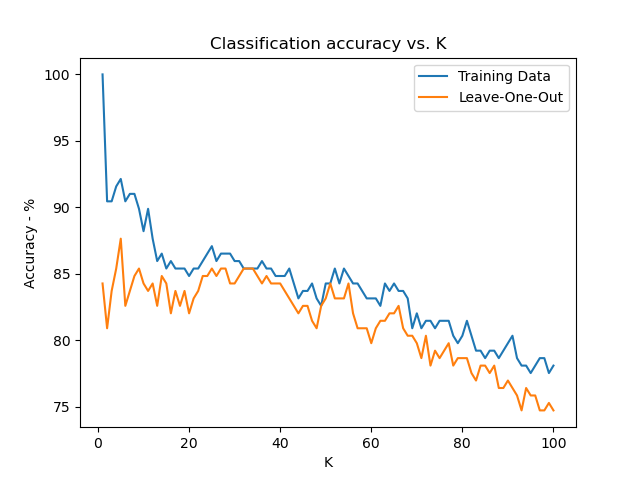

In [74]:

k = np.linspace(1,100,100)
plt.figure()
plt.title("Classification accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy - %")

plt.plot(k, field,label="Training Data")
plt.plot(k,array,label="Leave-One-Out")

plt.legend()
plt.show()


<font color = red> 
    ***OBSERVATII***
    <br><br> When testing with the training data, we can see that we have some instances of 100% accuracy. This tells us that our model is getting each guess right. Although at first glance this would be an ideal result, testing with the training data doesn't show us anything else but the power to memorise of our model. We are more interested to see if our model actually understands the trend of the data, so if we were to feed it new, unknown data enteries, it should know what to do and make most of the guesses correctly.<br><br>